In [34]:
#get libaries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [26]:
#data files
mouse_path_csv = './Resources/Mouse_metadata.csv'
study_results_csv = './Resources/Study_results.csv'


#dataframes
mouse_metadata_df = pd.read_csv(mouse_path_csv)
study_results_df = pd.read_csv(study_results_csv)

#merge the dataframes together on Mouse ID
merged_df = pd.merge(study_results_df, mouse_metadata_df, how='left', on=['Mouse ID', 'Mouse ID'])

merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
drug_df = merged_df.groupby('Drug Regimen')

mean_tumor_volume = drug_df['Tumor Volume (mm3)'].mean()

median_tumor_volume = drug_df['Tumor Volume (mm3)'].median()

var_tumor_volume = drug_df['Tumor Volume (mm3)'].var()

std_tumor_volume = drug_df['Tumor Volume (mm3)'].std()

sem_tumor_volume = drug_df['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume':mean_tumor_volume,
    'Median Tumor Volume':median_tumor_volume,
    'Tumor Volume Variance':var_tumor_volume,
    'Tumor Volume Std. Dev.':std_tumor_volume,
    'Tumor Volume Std. Err.':sem_tumor_volume
})

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
agg_summary_stats = drug_df['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

agg_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, '# of Observered Mice Timepoints per Drug Regimen')

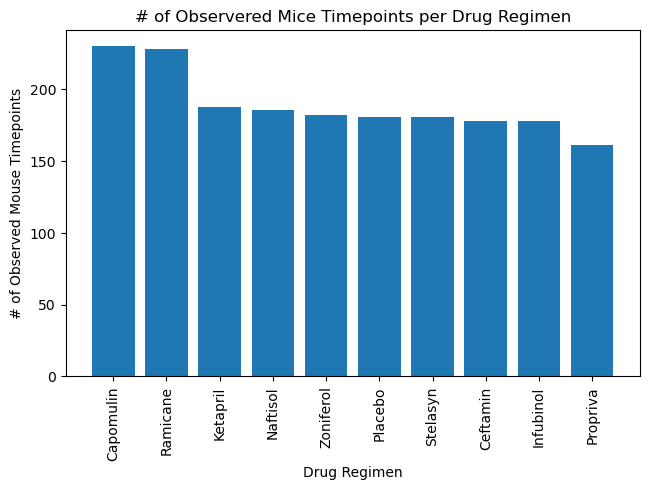

In [84]:
mouse_counts = drug_df['Mouse ID'].count()

mouse_counts = mouse_counts.sort_values(ascending=False)


plt.bar(np.arange(0,len(mouse_counts),1),mouse_counts)
plt.xticks(ticks=np.arange(0,len(mouse_counts),1),labels=mouse_counts.index,rotation=90)
plt.xlabel('Drug Regimen')
plt.tight_layout()
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('# of Observered Mice Timepoints per Drug Regimen')

